# Dense Subgraphs

This example uses the frequent paths obtained from the twitter data to discover dense subgraphs

In [56]:
import networkx as nx
import folium
%matplotlib inline

We will use the frequent paths from London (51.23, 51.8, -0.5, 0.25). You can also use "bcntwitter" (41.20, 41.6, 1.90, 2.40) and "paristwitter" (48.7, 49.05, 1.97, 2.68) and the networkx graph library. First we will build a graph with all the frequent paths.

In [65]:
from Code.Constants import  cityparams
city = 'paris'
params = cityparams[city]
dfile = city + 'instagramkmeans-tr618-sp20'
fname = '../Routes/' + dfile + '.txt'
coord = params[1]

rfile = open(fname, 'r')

gr = nx.Graph()

mymap = folium.Map(location=[(coord[0] + coord[1]) / 2.0, (coord[2] + coord[3]) / 2.0], zoom_start=13, width=1000,
                   height=700)

maplines = []
for lines in rfile:
    lines = lines[:lines.find(']')]
    vals = lines.replace('[', '').replace(']','').replace('\n','').replace('\'','').replace(' ','').split(',')
    for v1 in vals:
        for v2 in vals:
            if v1 != v2:
                gr.add_edge(v1,v2) 
                x1, y1, _ = v1.split('#')
                x2, y2, _ = v2.split('#')
                maplines.append(folium.PolyLine(locations=[(float(x1), float(y1)), (float(x2), float(y2))], color='red', opacity=1.0, weight=2))
               
for ln in maplines:
     mymap.add_children(ln)

This is the complete graph

In [66]:
mymap

Now we will compute all the cliques and keep all that have a size larger than **minsize**, and represent the distribution of the sizes.

Num of cliques = 772


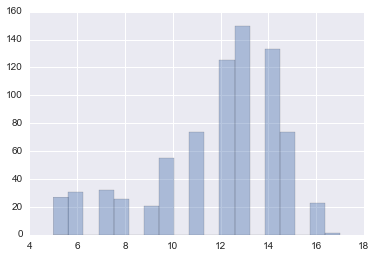

In [67]:
import seaborn as sns

minsize = 5
a = nx.find_cliques(gr)

subg = [g for g in a if len(g)>=minsize]
print("Num of cliques = %d" % len(subg))

if len(subg) != 0:
    gdist = [len(g) for g in subg]
    sns.distplot(gdist, kde=False)

Now we can visualize the cliques the final map will visualize one of them (you can change the value to see different cliques)

In [68]:
# Pick the clique to visualize
c = subg[5]

mymap = folium.Map(location=[(coord[0] + coord[1]) / 2.0, (coord[2] + coord[3]) / 2.0], zoom_start=13, width=1000,
                   height=700)
seq = []
for i in c:
    x, y, h = i.split('#')
    seq.append((x, y, h))
for s1 in seq:
    for s2 in seq:
        if s1 != s2:
            x1, y1, _ = s1
            x2, y2, _ = s2
            x1 = float(x1)
            y1 = float(y1)
            x2 = float(x2)
            y2 = float(y2)
            l = folium.PolyLine(locations=[(x1, y1), (x2, y2)], color='red', opacity=1.0, weight=2)
            mymap.add_children(l)

mymap

We can also extract other dense graphs like the $k$-cores, graphs where all the nodes have a degree higher or equal than $k$

In [69]:
kcore = nx.k_core(gr,k=10)
print len(kcore)

76


In [70]:
mymap = folium.Map(location=[(coord[0] + coord[1]) / 2.0, (coord[2] + coord[3]) / 2.0], zoom_start=13, width=1000,
                   height=700)

maplines = []
for ed1, ed2 in nx.edges_iter(kcore):
    x1, y1, _= ed1.split('#')
    x2, y2, _= ed2.split('#')
    x1 = float(x1)
    y1 = float(y1)
    x2 = float(x2)
    y2 = float(y2)    

    maplines.append(folium.PolyLine(locations=[(x1, y1), (x2, y2)], color='red', opacity=1.0, weight=2))
    
for ln in maplines:
    mymap.add_children(ln)
mymap

We can also apply a community discovery algorithm from social networks to partition the graph. We will use the community python package http://perso.crans.org/aynaud/communities/index.html

In [71]:
import community
def colorize(v):
    v = int(2**24 /(v+50)*50)
    return('#%s'%hex(v)[2:])

partition = community.best_partition(gr)
dpart = set()

mymap = folium.Map(location=[(coord[0] + coord[1]) / 2.0, (coord[2] + coord[3]) / 2.0], zoom_start=13, width=1000,
                   height=700)
for vert in partition:
    x1, y1, _= vert.split('#')
    c = colorize(partition[vert])
    dpart.add(c)
    mymap.circle_marker(location=[x1,y1], radius=100, line_color=c, fill_color=c, 
                        fill_opacity=1, popup=str(partition[vert]))
print 'Num Partitions=', len(dpart)
mymap.create_map(path='../Results/' + dfile + '-routes-partition.html')
mymap

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: Map.create_map is deprecated. Use Map.save instead


Num Partitions= 9
